In [68]:
# PROBLEM STATEMENT /DEFINITION	Create a Linear Regression Model using Python/R to 
# predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing).
# The Boston Housing dataset contains information about various houses in Boston through 
# different parameters. There are 506 samples and 14 feature variables in this dataset.
# The objective is to predict the value of prices of the house using the given features.


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [70]:
df=pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [71]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [72]:
df.count()

CRIM       486
ZN         486
INDUS      486
CHAS       486
NOX        506
RM         506
AGE        486
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      486
MEDV       506
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [74]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [75]:
#CRIM: per capita crime rate by town

#ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

#INDUS: proportion of non-retail business acres per town

# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

# NOX: nitric oxides concentration (parts per 10 million)

# RM: average number of rooms per dwelling

# AGE: proportion of owner-occupied units built prior to 1940

# DIS: weighted distances to ﬁve Boston employment centers

# RAD: index of accessibility to radial highways

# TAX: full-value property-tax rate per 10,000

# PTRATIO: pupil-teacher ratio by town

# B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town

# LSTAT: % lower status of the population

# MEDV: Median value of owner-occupied homes in 1000s

(df==0).sum()

CRIM         0
ZN         360
INDUS        0
CHAS       452
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64

In [76]:
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(), inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)

C:\Users\moren\AppData\Local\Temp\ipykernel_14004\4278606179.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
C:\Users\moren\AppData\Local\Temp\ipykernel_14004\4278606179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [77]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

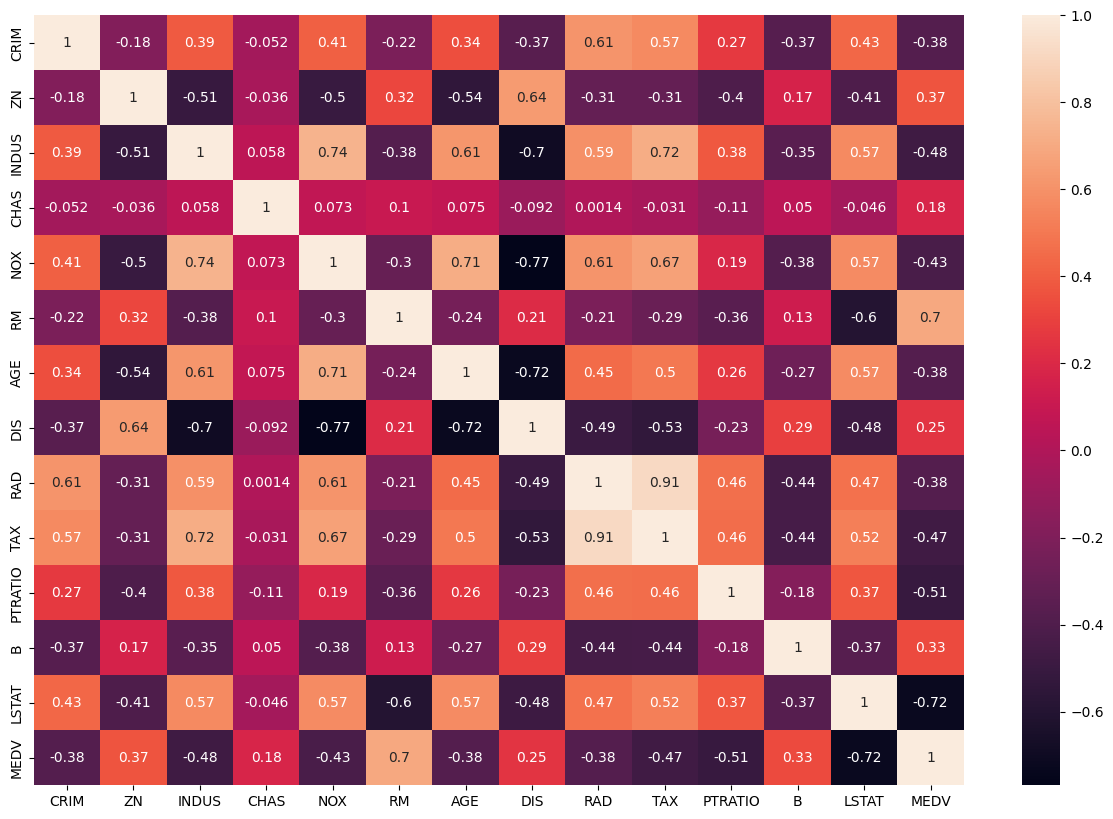

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [79]:
x=df[['LSTAT']]
y=df[['MEDV']]
print(x)
print(y)

         LSTAT
0     4.980000
1     9.140000
2     4.030000
3     2.940000
4    12.715432
..         ...
501  12.715432
502   9.080000
503   5.640000
504   6.480000
505   7.880000

[506 rows x 1 columns]
     MEDV
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print("NAN values in X_train: ", x_train.isnull().sum()) 
print("NAN values in X_test: ", x_test.isnull().sum()) 

NAN values in X_train:  LSTAT    0
dtype: int64
NAN values in X_test:  LSTAT    0
dtype: int64


In [81]:
model = LinearRegression()


In [82]:
model.fit(x_train,y_train)

LinearRegression()

In [83]:
y_pred = model.predict(x_test)

In [84]:
print(y_pred)

[[23.38767107]
 [23.56995002]
 [17.48758913]
 [ 5.20774379]
 [20.80698482]
 [14.17778707]
 [16.31716637]
 [29.10547406]
 [12.50849559]
 [27.46496347]
 [30.0072752 ]
 [31.57103675]
 [21.02763829]
 [28.10773662]
 [22.62977437]
 [28.89441422]
 [27.30187177]
 [28.75050978]
 [ 9.20828715]
 [27.41699532]
 [22.3559414 ]
 [30.0744306 ]
 [19.00338254]
 [29.10547406]
 [ 4.99668395]
 [22.46668267]
 [26.7838158 ]
 [22.65855525]
 [18.99378891]
 [25.44070771]
 [16.84481598]
 [27.46496347]
 [ 7.38549761]
 [20.94129563]
 [16.95993953]
 [25.51745675]
 [28.20367291]
 [17.16140574]
 [25.4694886 ]
 [16.60497525]
 [21.28666628]
 [24.55809383]
 [17.15181211]
 [19.26241053]
 [18.15914317]
 [31.52306861]
 [24.7787473 ]
 [15.06040095]
 [31.00501263]
 [24.80752819]
 [12.23028034]
 [22.90798961]
 [13.65973109]
 [21.51691338]
 [18.13036228]
 [30.11280512]
 [29.64271729]
 [16.0293575 ]
 [17.16140574]
 [22.3559414 ]
 [20.71104853]
 [23.73304172]
 [29.47962559]
 [25.0761498 ]
 [22.15968654]
 [20.35608425]
 [28.25164

In [85]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = (np.sqrt(mse))

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

# Mean Absolute Error (MAE): Represents the average absolute difference
# between the true and predicted values. Lower values indicate better performance.
# Mean Squared Error (MSE): Represents the average of the squared differences
# between the true and predicted values. Lower values indicate better performance
# , with MSE penalizing larger errors more than MAE.

Mean Squared Error:  47.489870095004434
Mean Absolute Error:  4.781708259787071
Root Mean Squared Error:  6.8912894363104815


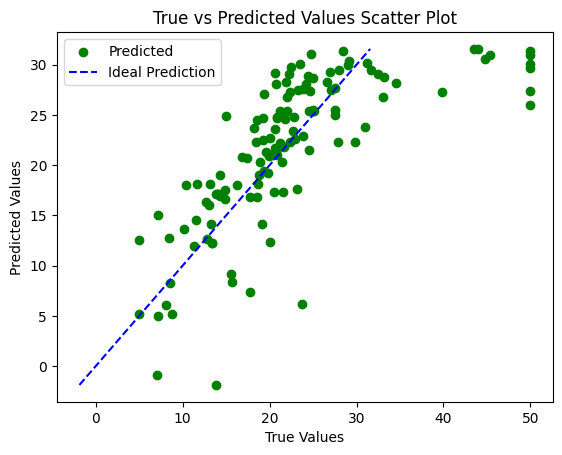

In [88]:
plt.scatter(y_test,y_pred,color='green',label='Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values Scatter Plot')

# Add a diagonal line for reference (ideal prediction)
plt.plot([min(y_pred),max(y_pred)],[min(y_pred),max(y_pred)],color='blue',linestyle='--', label='Ideal Prediction')
# Add a legend
plt.legend()

# Display the plot
plt.show()

In [58]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predicted target values
# R-squared (R2) Score: It ranges from 0 to 1, where 1 indicates a perfect fit. 
# Higher values of R2 indicate that the model explains a larger proportion of
# the variance in the target variable.

r2 = r2_score(y_test, y_pred)
print(r2)


0.6380319348777392
